<a href="https://colab.research.google.com/github/veeramohansadhu/AWS-Blog/blob/main/Prodigy_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic.zip to titanic.zip


In [4]:
import zipfile
import os

with zipfile.ZipFile("titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("data_folder")


In [40]:
os.listdir("data_folder")


['test.csv', 'train.csv', 'gender_submission.csv']

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
test = pd.read_csv('data_folder/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [45]:
train=pd.read_csv('data_folder/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
Gs=pd.read_csv('data_folder/gender_submission.csv')
Gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [61]:
#Fill or drop missing values
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test.drop('Cabin', axis=1, inplace=True)

train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train.drop('Cabin', axis=1, inplace=True)



/tmp/ipython-input-61-590821730.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
/tmp/ipython-input-61-590821730.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [64]:
Gs.isna().sum()

,0
PassengerId,0
Survived,0


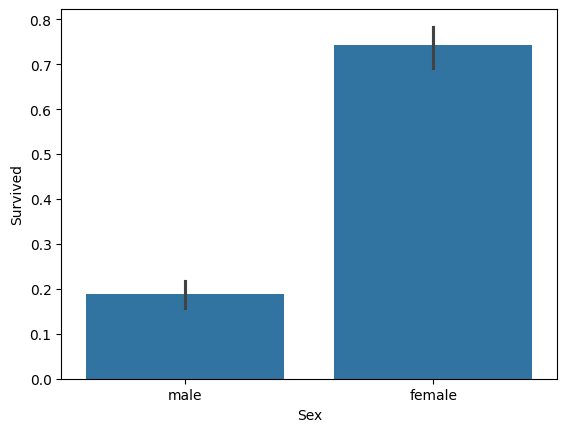

In [67]:
#Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=train)
plt.show()

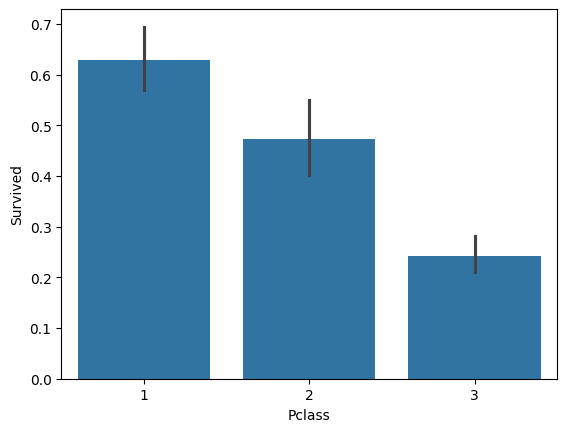

In [68]:
#Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

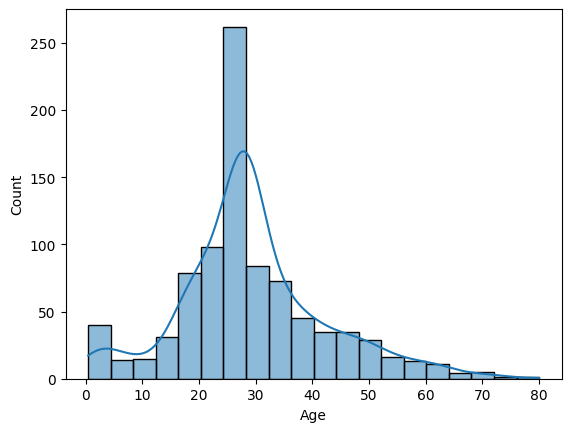

In [98]:
#Age distribution
sns.histplot(train['Age'], bins=20, kde=True)
plt.show()

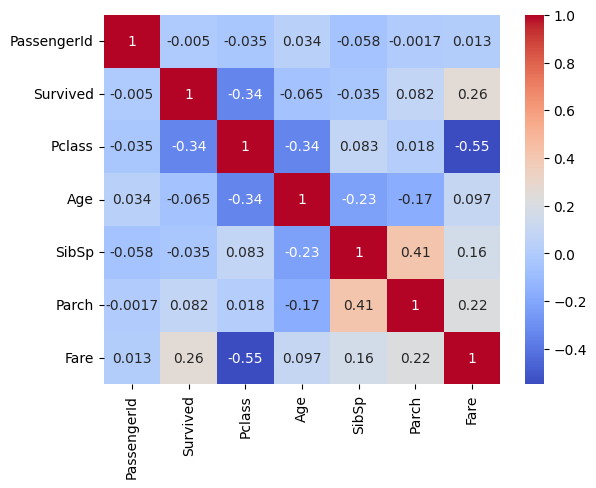

In [80]:
#Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = train.select_dtypes(include=['number'])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()



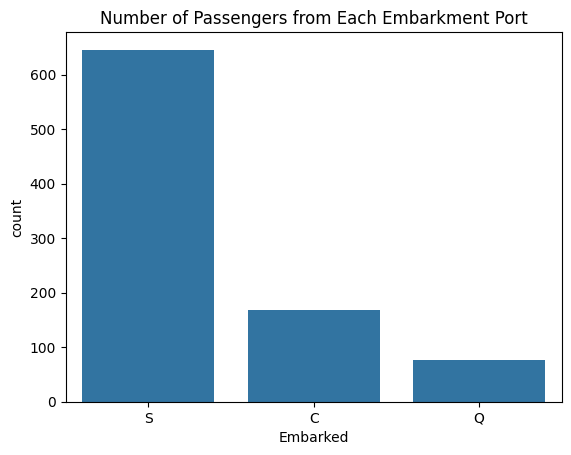

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Embarked', data=train)
plt.title("Number of Passengers from Each Embarkment Port")
plt.show()


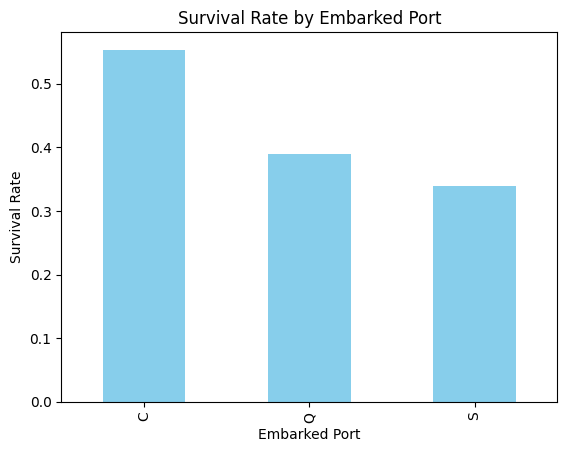

In [88]:
#Survival Rate by Embarked Port
train.groupby('Embarked')['Survived'].mean().plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Embarked Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked Port')
plt.show()


In [89]:
#survival rat by gender
train.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [90]:
#survival rate by class
train.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [94]:
#survival rate by embarked
train.groupby('Embarked')['Survived'].count()

,Survived
Embarked,
C,168
Q,77
S,646


In [100]:
# First create age bins
train['AgeGroup'] = pd.cut(train['Age'], bins=[0,10,20,30,40,50,60,80], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60+'])
train.groupby('AgeGroup')['Survived'].mean()


/tmp/ipython-input-100-3166185734.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('AgeGroup')['Survived'].mean()


,Survived
AgeGroup,
0-10,0.593750
10-20,0.382609
20-30,0.334152
30-40,0.445161
40-50,0.383721
50-60,0.404762
60+,0.227273


<Axes: xlabel='Survived', ylabel='Fare'>

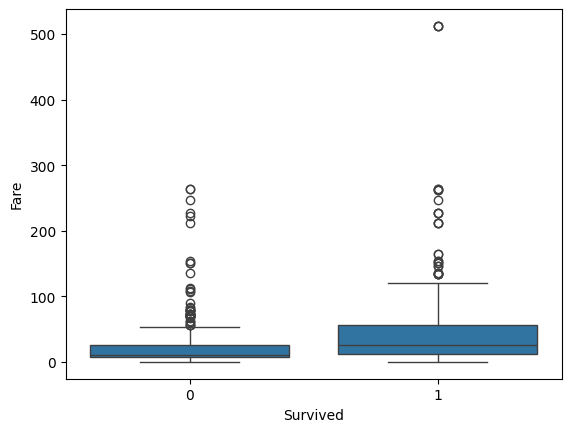

In [96]:
sns.boxplot(x='Survived', y='Fare', data=train)
